In [32]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [33]:
# me-load dataset
dataset = pd.read_csv('DataSet.csv')
dataku = pd.DataFrame(dataset)
data = np.asarray(dataset)
dataset.head()

,Keaktifan,Ketuntasan
0,57.14,50.00
1,42.86,44.44
2,71.43,100.00
3,42.86,72.22
4,28.57,16.67


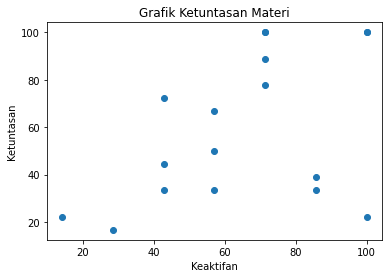

In [34]:
# menampilkan pesebaran data
plt.scatter(data[:,0],data[:,1],label='True Position')
plt.xlabel("Keaktifan")
plt.ylabel("Ketuntasan")
plt.title("Grafik Ketuntasan Materi")
plt.show()

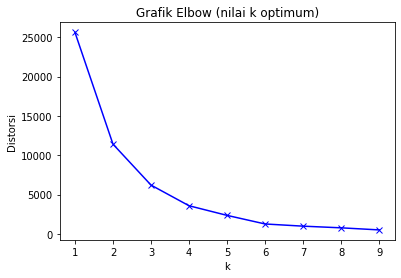

In [35]:
# mencari nilai k optimum
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    distortions.append(kmeanModel.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsi')
plt.title('Grafik Elbow (nilai k optimum)')
plt.show()

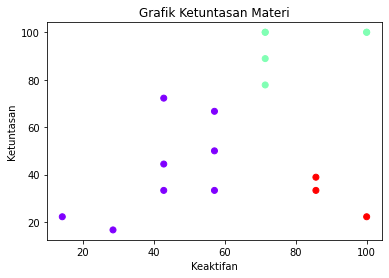

In [36]:
# membagi data menjadi 3 klaster dibedakan dengan warna
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
plt.scatter(data[:,0],data[:,1],c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Keaktifan")
plt.ylabel("Ketuntasan")
plt.title("Grafik Ketuntasan Materi")
plt.show()


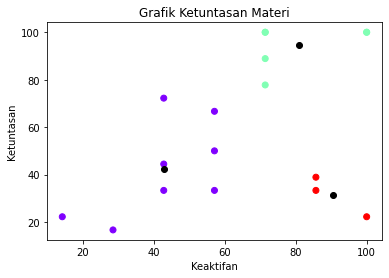

In [37]:
# menampilkan pesebaran data beserta titik centroid
plt.scatter(data[:,0],data[:,1],c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.xlabel("Keaktifan")
plt.ylabel("Ketuntasan")
plt.title("Grafik Ketuntasan Materi")
plt.show()

In [38]:
# menscalakan data
scaler = StandardScaler()
scaler.fit(dataset)
data_scaled = scaler.transform(dataset)
# konversi data skala ke dataframe
data_scaled = pd.DataFrame(data_scaled, columns=['Keaktifan','Ketuntasan'])
data_scaled

array([[-0.30810288, -0.29338192],
       [-0.88962252, -0.47826397],
       [ 0.27382398,  1.36922647],
       [-0.88962252,  0.44548125],
       [-1.47154939, -1.40167667],
       [ 1.43727049, -1.21712714],
       [ 0.27382398,  0.99979489],
       [ 0.27382398,  0.6303633 ],
       [ 1.43727049,  1.36922647],
       [ 1.43727049,  1.36922647],
       [-2.05306903, -1.21712714],
       [-0.30810288, -0.84769556],
       [-0.30810288,  0.26093172],
       [-0.88962252, -0.84769556],
       [ 0.85534362, -0.84769556],
       [ 0.85534362, -0.66281351],
       [ 0.27382398,  1.36922647]])

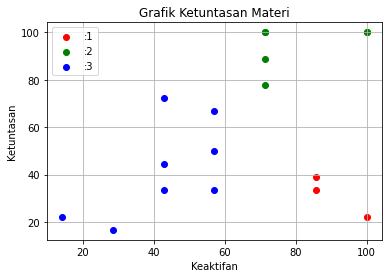

In [39]:
# melakukan prediksi klastering
data_predict = kmeans.fit_predict(data_scaled[['Keaktifan','Ketuntasan']])
dataset['Klasifikasi'] = data_predict
dataset1 = dataset[dataset.Klasifikasi==0]
dataset2 = dataset[dataset.Klasifikasi==1]
dataset3 = dataset[dataset.Klasifikasi==2]
plt.scatter(dataset1.Keaktifan, dataset1.Ketuntasan, color='red')
plt.scatter(dataset2.Keaktifan, dataset2.Ketuntasan, color='green')
plt.scatter(dataset3.Keaktifan, dataset3.Ketuntasan, color='blue')
plt.xlabel("Keaktifan")
plt.ylabel("Ketuntasan")
plt.title("Grafik Ketuntasan Materi")
plt.legend([':1',':2',':3'])
plt.grid()

In [40]:
# memasukkan data hasil ke dataframe
conditions = [
    (dataset['Klasifikasi']==0),
    (dataset['Klasifikasi']==1),
    (dataset['Klasifikasi']==2)]
choices = ['Rendah','Sedang','Tinggi']
dataset['Klasifikasi'] = np.select(conditions, choices)
dataset

,Keaktifan,Ketuntasan,Klasifikasi
0,57.14,50.00,Tinggi
1,42.86,44.44,Tinggi
2,71.43,100.00,Sedang
3,42.86,72.22,Tinggi
4,28.57,16.67,Tinggi
5,100.00,22.22,Rendah
6,71.43,88.89,Sedang
7,71.43,77.78,Sedang
8,100.00,100.00,Sedang
9,100.00,100.00,Sedang


In [43]:
# menyimpan data ke file csv
databaru = pd.DataFrame(dataset, columns=['Keaktifan','Ketuntasan','Klasifikasi'])
databaru.to_csv(r'DataBaru.csv', index=False, header=True)